# Principal Component Analysis (PCA)
# 1. Definition
**PCA,** is a **dimensionality reduction** method that is often used to **reduce the dimensionality of large data sets,** *by transforming a large set of variables into a* **smaller one** that still contains most of the information in the large set.

**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

The **PCA** example has been illustrated with the **handwritten digits** example from **scikit-learn** datasets, in which handwritten digits are created from **0-9** and its respective **64 features (8 x 8 matrix)** of pixel intensities. <br>
Here, the idea is to represent the original features of *64 dimensions into as few as possible:*

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics

# 3. Load dataset

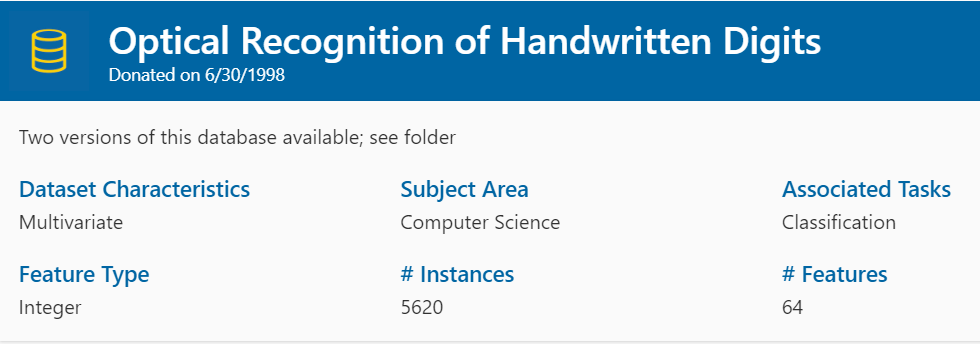


In [2]:
'''
df = pd.read_csv('optdigits.tra')
feature_names = ['class0', 'class1','class2','class3','class4','class5','class6','class7','class8','class9',]
# df = df.rename(columns=dict(zip(df.columns, feature_names)))
df = df(index=None)
df.head()
'''

"\ndf = pd.read_csv('optdigits.tra')\nfeature_names = ['class0', 'class1','class2','class3','class4','class5','class6','class7','class8','class9',]\n# df = df.rename(columns=dict(zip(df.columns, feature_names)))\ndf = df(index=None)\ndf.head()\n"

In [3]:
digits = load_digits()
print("\nlist all the attributes of digits dataset...\n")
dir(digits)


list all the attributes of digits dataset...



['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# digits

In [5]:
print("\nprint all the feature's name (columns) of digit dataset...\n\n", digits.feature_names)


print all the feature's name (columns) of digit dataset...

 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


# 4. Dataset EDA (Exploratory Data Analysis)

In [6]:
print("\nprint the index for Series and columns for DataFrame...\n\n", digits.keys())


print the index for Series and columns for DataFrame...

 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [7]:
# shape matrix rows and columns of the images
print("\nprint the shape matrix (rows & columns) of the images dataset...\n\n",
digits.images.shape)


print the shape matrix (rows & columns) of the images dataset...

 (1797, 8, 8)


In [8]:
# feature names of digit dataset row index
print("\nprint the feature names of digit dataset row index...\n\n",
digits.feature_names[0:7])


print the feature names of digit dataset row index...

 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6']


In [9]:
# number of features in the digit dataset
print("\nprint the number of features in the digit dataset...\n\n", len(digits.feature_names))


print the number of features in the digit dataset...

 64


In [10]:
# feature's length (number of instances) of the dataset
print("\nprint the feature's length (number of instances) of the digit dataset...\n\n",len(digits.data))


print the feature's length (number of instances) of the digit dataset...

 1797


In [11]:
# target's length of the dataset
print("\nprint the target's length of the digit dataset...\n\n",len(digits.target))


print the target's length of the digit dataset...

 1797


In [12]:
# shape matrix rows and columns of the dataset
print("\nprint the shape matrix (rows & columns) of the digit dataset...\n\n",
digits.data.shape)


print the shape matrix (rows & columns) of the digit dataset...

 (1797, 64)


In [13]:
# number of categories (multi-class) in the target
print("\nprint the number of categories (multi-class) in the target...\n\n",
len(np.unique(digits.target)))
# len(digits.target_names)


print the number of categories (multi-class) in the target...

 10


In [14]:
# Convert the NumPy array to a pandas Series and then apply the method
pd.Series(digits.target).value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

In [15]:
# different categories (multi-class) of the target
print("\nprint the different categories (multi-class) of the target...\n\n",
digits.target_names)


print the different categories (multi-class) of the target...

 [0 1 2 3 4 5 6 7 8 9]


# 5. Data Visualization

Visualize the **first 3 images** of hand written digit dataset. The **target attribute** of the digit dataset stores the **digit image** representations and this is included in the *title of the 3 plots below.*

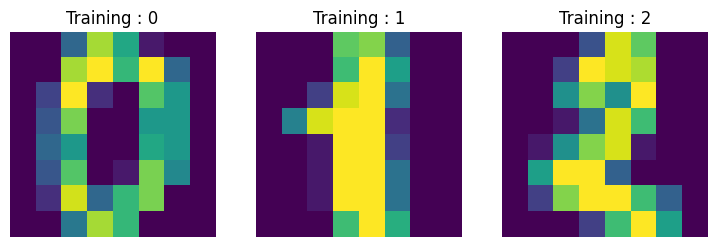

In [16]:
%matplotlib inline

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for axes, image, label in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    # axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.imshow(image, cmap='viridis', interpolation='nearest')
    axes.set_title('Training : %i' % label)

In [17]:
# verify the first 3 target attribute from digit dataset
digits.target[:3]

array([0, 1, 2])

In [18]:
# the first 3 target attribute class from digit dataset
digits.target_names[digits.target[:3]]

array([0, 1, 2])

# 6. Data Preprocessing

## Flattening the 2-D array
The **digit dataset,** usually consists of images in a **2-D array format (e.g., 8x8 pixels).** Therefore, we need to **flatten the 2-D arrays into 1-D arrays (vectors).**
<br>
#### For instance, a **8x8 image** would be **flattened** into a **vector of size 64.**

In [19]:
digits.images.shape[0]

1797

In [20]:
# flatten the 2-D images of digit dataset into 1-D vector
data = digits.images.reshape((digits.images.shape[0], -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# 7. Data distribution into train and test dataset

In [21]:
from sklearn.model_selection import train_test_split

# split the digit dataset into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=0)

In [22]:
# length of independent training dataset variables
print("\nprint the length of independent training dataset variables...\n\n",len(X_train))

# length of dependent training dataset variables
print("\nprint the length of dependent training dataset variables...\n\n",len(y_train))

# length of independent test dataset variables
print("\nprint the length of independent test dataset variables...\n\n",len(X_test))

# length of dependent test dataset variables
print("\nprint the length of dependent test dataset variables...\n\n",len(y_test))


print the length of independent training dataset variables...

 1347

print the length of dependent training dataset variables...

 1347

print the length of independent test dataset variables...

 450

print the length of dependent test dataset variables...

 450


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Convert the NumPy array to a pandas Series and then apply the method
num_table = pd.Series(y_train).value_counts()
num_table = num_table.sort_index()
num_table

0    141
1    139
2    133
3    138
4    143
5    134
6    129
7    131
8    126
9    133
Name: count, dtype: int64

In [25]:
# Convert the series to a DataFrame for Seaborn
num_table_df = num_table.reset_index(name='label') # Convert to DataFrame

<ipython-input-26-5b5224058ced>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='label', data=num_table_df, palette='deep', width=0.5)


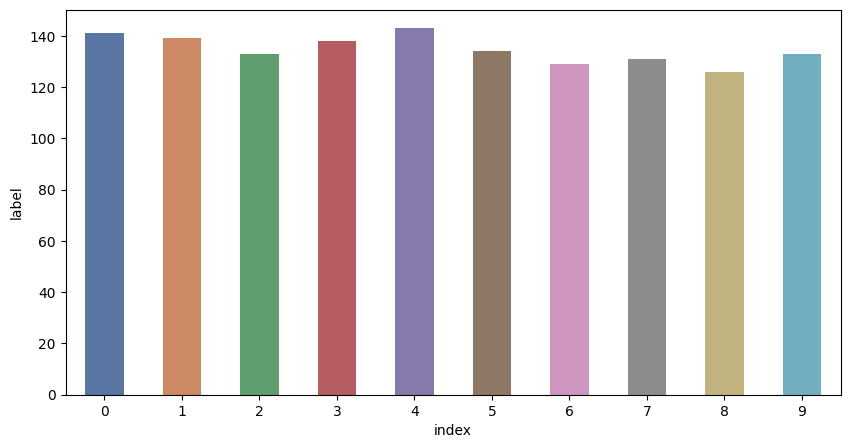

In [26]:
plt.figure(figsize=(10, 5))
# can choose other palettes like 'deep', 'muted', 'pastel', etc.
sns.barplot(x='index', y='label', data=num_table_df, palette='deep', width=0.5)

# create the barplot with custom color palette
# colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
# sns.barplot(x='index', y='label', data=num_table_df, palette=colors, width=0.5)

plt.show()

# 8. Model creation (PCA)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

* The **StandardScaler** standardizes the features by removing the **mean** and **scaling** to *unit variance.*
* The **PCA reduces the dimensionality** of the data while preserving **95%** of the variance threshold.
* The **Pipeline** chains these two steps together, ensuring that they are applied in sequence.

## 8.1 Pipeline the dataset

In [28]:
# define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
])

## 8.2 Transform or fits the **Standard Scaler and PCA** to the dataset

In [29]:
# fit or train the pipeline model to the data
X_train_pca = pipeline.fit_transform(X_train)
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('pca', PCA(n_components=0.95))],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(n_components=0.95),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

## Key Points about explained_variance_ratio_:
#### 1. Variance Contribution:
*Each value in **explained_variance_ratio_** represents the fraction of the total variance explained by each principal component.*
#### 2. Sum to 1:
*The sum of all the values in **explained_variance_ratio_** will be **1 (or close to 1,** due to floating-point arithmetic), as it represents the entire dataset's variance.*
#### 3. Ordering:
*The principal components are ordered by the amount of variance they capture, with the first principal component capturing the most variance, the second capturing the next most, and so on.*

In [30]:
print("\nfraction of the total explained variance by each principal component...\n")
explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
explained_variance_ratio


fraction of the total explained variance by each principal component...



array([0.12207819, 0.09543181, 0.08570407, 0.06526013, 0.04880912,
       0.04261766, 0.03917588, 0.03304347, 0.03026401, 0.02870165,
       0.02769043, 0.02645606, 0.0232318 , 0.02204086, 0.02047665,
       0.01810611, 0.01735037, 0.01680614, 0.01623618, 0.01523657,
       0.01349171, 0.0128758 , 0.01163906, 0.0106949 , 0.01017624,
       0.00942662, 0.00926156, 0.00839755, 0.00808616, 0.00785251,
       0.00753043, 0.00698386, 0.00667735, 0.00636144, 0.00588387,
       0.00560175, 0.00473309, 0.00449665, 0.00427328, 0.00406056])

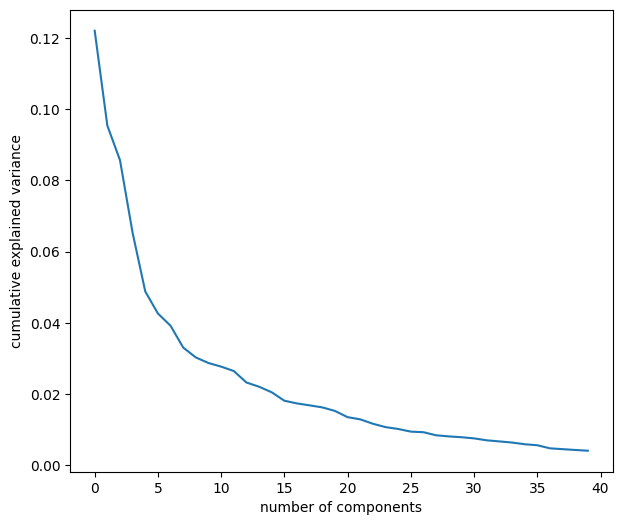

In [31]:
# making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (7,6))
plt.plot(explained_variance_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Cumulative Explained Variance
to compute the **cumulative explained variance,** to determine how many principal components are needed; to explain a certain amount of the total variance.

*This helps in deciding the number of principal components to retain while performing dimensionality reduction.*

In [32]:
print("\nfraction of the cumulative explained variance by each principal component...\n")
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance


fraction of the cumulative explained variance by each principal component...



array([0.12207819, 0.21751   , 0.30321407, 0.3684742 , 0.41728331,
       0.45990097, 0.49907685, 0.53212032, 0.56238432, 0.59108598,
       0.61877641, 0.64523246, 0.66846426, 0.69050513, 0.71098177,
       0.72908788, 0.74643825, 0.7632444 , 0.77948057, 0.79471714,
       0.80820885, 0.82108465, 0.83272372, 0.84341862, 0.85359486,
       0.86302148, 0.87228304, 0.88068059, 0.88876675, 0.89661926,
       0.9041497 , 0.91113356, 0.91781091, 0.92417235, 0.93005622,
       0.93565797, 0.94039105, 0.9448877 , 0.94916098, 0.95322154])

In [33]:
print("principal components % that capture most of the variance in the data...\n\n", pipeline.named_steps['pca'].n_components)
# BTW, "n_components" : The number of components specified when setting up PCA (before fitting).

principal components % that capture most of the variance in the data...

 0.95


In [34]:
print("\nactual number of components retained after fitting PCA...\n", pipeline.named_steps['pca'].n_components_)


actual number of components retained after fitting PCA...
 40


In [35]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [36]:
# shape matrix (rows and columns) of original digit's dataset
print("\nprint the shape matrix (rows & columns) of original digit's dataset...\n\n", X_train.shape)

print("\nprint the shape matrix (rows & columns) of digit's dataset after PCA implementation or deployment...\n\n", X_train_pca.shape)


print the shape matrix (rows & columns) of original digit's dataset...

 (1347, 64)

print the shape matrix (rows & columns) of digit's dataset after PCA implementation or deployment...

 (1347, 40)


In [37]:
# X_train_pca

## 8.3 Standardized feature data using the mean and standard deviation

In [38]:
# standardized data using the mean and standard deviation during fitting.
X_train_std = pipeline.transform(X_train)

In [39]:
# X_train_std

In [40]:
# shape matrix (rows and columns) of digit's dataset after PCA implementation or deployment
print("\nprint the shape matrix (rows & columns) of digit's dataset after PCA implementation or deployment...\n\n",
X_train_std.shape)


print the shape matrix (rows & columns) of digit's dataset after PCA implementation or deployment...

 (1347, 40)


# 9. Build and evaluate the model

## 9.1 Support Vector Machine

In [41]:
# svm_model = SVC(kernel='linear', C=1.0, random_state=0)
svm_model = SVC(C=10, gamma = 0.001, kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM Accuracy : \n", metrics.accuracy_score(y_test, y_pred))

SVM Accuracy : 
 0.9933333333333333


## 9.2 K Nearest Neighbors (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy : \n", metrics.accuracy_score(y_test, y_pred_knn))

KNN Accuracy : 
 0.9866666666666667


## 9.3 Neural Network (Multilayer Perceptron)

In [43]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Accuracy : \n", metrics.accuracy_score(y_test, y_pred_mlp))

Neural Network Accuracy : 
 0.9733333333333334
